In [13]:
import sys
sys.path.insert(1, '../')
sys.path.insert(1, '../../')
import numpy as np
import matplotlib.pyplot as plt
from util.coil import *
from util.mask import *
from util.fft import *
import util.simulator as simulate
from util.phantom import * 
from rank import *
import util.io as io
import random

In [14]:
filepath = '../../lib/resource/data/multicoil_1slice/meas_MID308_low_res_2dflash_FID17297.dat'
data = io.getCoilData(filepath) 
[ny, nx, nc] = data.shape
R = 4
mask = undersample.sense(data.shape,R)
dataR = np.zeros([ny, nx, nc], dtype=complex)
dataR = data*mask
k = 5
threshold = 50

pymapVBVD version 0.4.8
Software version: VB


Scan 1/1, read all mdhs:   0%|          | 0.00/33.6M [00:00<?, ?B/s]

read data:   0%|          | 0/256 [00:00<?, ?it/s]

In [1]:
patch = SAKE(dataR, k)

NameError: name 'SAKE' is not defined

In [30]:
U, S, VT = np.linalg.svd(patch ,full_matrices=False)
S = np.diag(S)

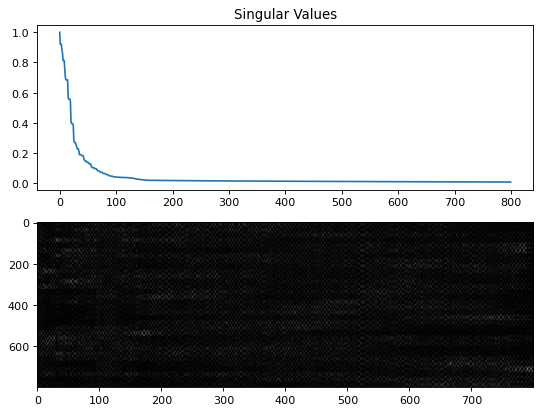

In [31]:
plt.figure(figsize=(8, 6), dpi=80)
plt.subplot(2,1,1)
plt.plot(np.diag(S)/np.max(np.diag(S)))
plt.title('Singular Values')
plt.subplot(2,1,2)
plt.imshow(np.abs(np.transpose(VT)),aspect='auto', cmap = "gray")
plt.show()

In [32]:
patch = U[:,:threshold] @ S[:threshold, :threshold] @  VT.conj().T[:threshold]
out = SAKE_adjoint(patch, k, (data.shape))
out = out * (1-mask) + dataR

In [33]:
out = SAKE_adjoint(patch, k, (data.shape))

In [34]:
out = out * (1-mask) + dataR

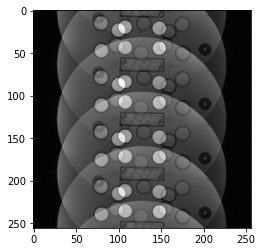

In [35]:
showrsos(ifft2c(out))